In [2]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import thinkdsp
import thinkplot
import thinkstats2 

import numpy as np

from matplotlib import pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
fsound = '402113__tayfunakgulankara__tk-perc-130-bpm.wav'

In [5]:
wave = thinkdsp.read_wave(fsound)
wave.make_audio()

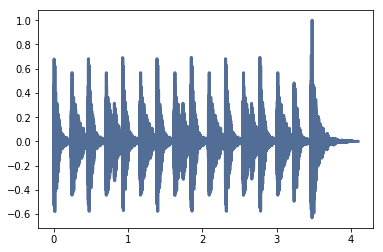

In [6]:
wave.plot()

# Idea
## Autocorrelation
https://en.wikipedia.org/wiki/Autocorrelation
- Given amount of shift -> Area between two signal graph
- Shift at the right amount -> minimize the area between the curves

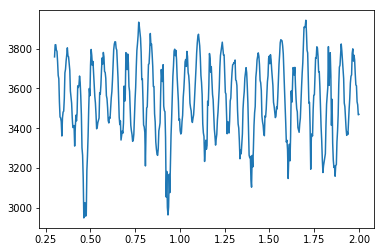

In [18]:
#calculate autocorrelation given amount of shift
def acc(wave,shift,duration):
    shifted_wave = wave.segment(shift,duration)
    org_wave = wave.segment(0,duration)
    diff = shifted_wave.ys - org_wave.ys
    return sum(abs(diff))

shifts = np.linspace(0.3,2,500)
accs = [acc(wave,shift,1.0) for shift in shifts]
plt.plot(shifts,accs)

In [13]:
shift = 0.1
duration = 1
shifted_wave = wave.segment(shift,duration)
org_wave = wave.segment(0,duration)
diff = shifted_wave.ys - org_wave.ys
print(sum(abs(diff)))

3515.12617285


In [22]:
# period (the minimum among the shifts)
T = shifts[np.argmin(accs)] 
f = 1/(T/60)
print(T,f)
# '402113__tayfunakgulankara__tk-perc-130-bpm.wav' -> 130bpm about 129 ! MAGIC!!

0.463527054108 129.44228275
